<a href="https://colab.research.google.com/github/schaidez2727/MAT-421/blob/main/ModuleH_MAT421_Chaidez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module H (HW 10) - MAT 421 #
#### Santana Chaidez ####

____
## ODE Initial Value Problem Statement ##
___

* **Differential Equation**: Relationship between a function, f(x), its idependent variable, x, and any number of its derivatives; used to model systems in all engineering and science fields
* Difficult to find exact solutions to differential equations --> need numerical solutions
* **Ordinary Differential Equation (ODE)**: a differential equation where the independent variable (and by extension, the derivatives) is in one dimension
* An nth-order ODE, where F is an arbitrary function that incorporates one or all input arguments, is written as:
$F(x, f(x), \frac{df(x)}{dx}, \frac{d^{2}f(x)}{dx^2}, \frac{d^{3}f(x)}{dx^3},...,\frac{d^{n-1}f(x)}{dx^{n-1}})=\frac{d^{n}f(x)}{dx^n}$
* **Initial Value**: a common set of known values for an ODE solution
* **Initial Value Problem (IVP)** = ODE with specified initial values
* **Partial Differential Equation (PDE)**: a general form differential equation where x is a vector containing the independent variables $(x_1, x_2, x_3, ..., x_m)$, and the partial derivatives can be of any order and with respect to any combination of variables
* **General Solution**: a function g(x) that satisfies the differential equation
* **Particular Solution**: solution for an ODE of order, denoted as p(x), that satisfies the differential equation and n explicitly known values of the solution, or its derivatives, at certain points; referred to as **the solution**

____
## Reduction of Order ##
___

* **Reduction of Order**: reducing the order of the differential equation to first order to aid in solving higher order differential equations
* This is because many numerical methods for solving IVPs are specifically designed to solve first-order differential equations
* To **reduce the order** of a differential equation, we consider the state space vector **S(t)**, which is the **state of the system as a function of time**
* The state of the system is typically a collection of all the dependent variables that are relevant to the behavior of the system
* S(t) is expressed as a column vector containing the relevant variables for the system such as: $[f(t); f^{(1)}(t); f^{(2)}(t); f^{(3)}(t); ...; f^{(n-1)}(t)]$, where $S_i(t)$ is the ith element of S(t)
* The derivative of S(t) can be represented as $\frac{dS(t)}{dt}=F(t, S(t))$, where F is a function that assembles the vector describing the derivative of the state S(t)
* ^^ This equation takes the form of a first-order differential equation in S, turning an nth-order ODE into n first-order ODEs that are **coupled** together (coupled = sharing the same terms)
* **Linear ODEs** can be written in matrix form: $\frac{dS(t)}{dt}=A*S(t)$, where A is a matrix containing system coefficients

____
## The Euler Method ##
___

* Let t be a numerical grid of the interval $[t_0, t_f]$ with spacing h (assuming $t_0=0$)
* Let $\frac{dS(t)}{dt}=F(t, S(t))$ be an explicitly defined first-order ODE, where F is a function that returns the derivative of a state S(t) given a time and state value
* The **Explicit Euler Formula** allows us to compute an approximation for the state at $S(t_{j+1})$ given the state at $S(t_j)$
* This linear approximation of S(t) around $t_j$ at $t_{j+1}$ can be written as:

$S(t_{j+1})=S(t_j)+(t_{j+1}-t_j)\frac{dS(t_j)}{dt}$

$=S(t_j)+hF(t_j, S(t_j))$
* Given initial value $S_0=S(t_0)$, use this formula to integrate the states up to $S(t_f)$
* These S(t) values can then be used to approximate the solution of the differential equation!
* This Euler method **integrates** the solution of the ODE. Utilizes the following steps:


1.   Create array S --> store initial value $S_0=S(t_0)$
2.   Compute value $S_1=S(t_1)=S_0+hF(t_0, S_0)$ and store in S
3. Compute value $S_2=S(t_2)=S_1+hF(t_1, S_1)$ and store in S
4. ... Repeat up to computation and storing of $S_{f-1}$...
5. Compute value $S_f=S(t_f)=S_{f-1}+hF(t_{f-1}, S_{f-1})$ and store in S
6. S is an approximation of the solution to the IVP


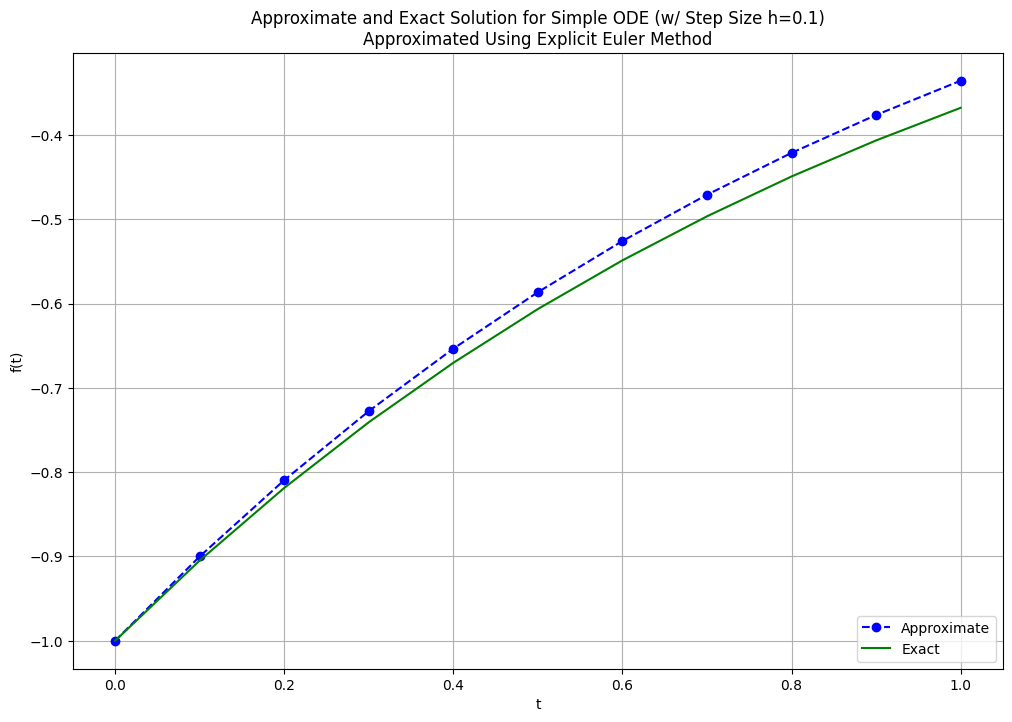

In [3]:
# Using Python to approximate the solution to an IVP with the Explicit Euler Method
# Differential equation df(t)/dt = e^(-t), initial condition f_0 = -1
# Exact solution: f(t) = -e^(-t)

import numpy as np
import matplotlib.pyplot as plt

# Define parameters of system
f = lambda t, s: np.exp(-t) # ODE
h = 0.1                     # Step size
t = np.arange(0, 1 + h, h)  # Numerical grid, t = [0, 1]
s0 = -1                     # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t)) # creating empty array for state vector S(t)
s[0] = s0 # inputting initial condition

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i]) # computing values for state vector using Explicit Euler formula

# Plot exact and approximate solutions
plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution for Simple ODE (w/ Step Size h=0.1)\nApproximated Using Explicit Euler Method')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

This gives us a pretty good approximation! But let's try to get a more accurate approximation with a smaller step size: h = 0.01.

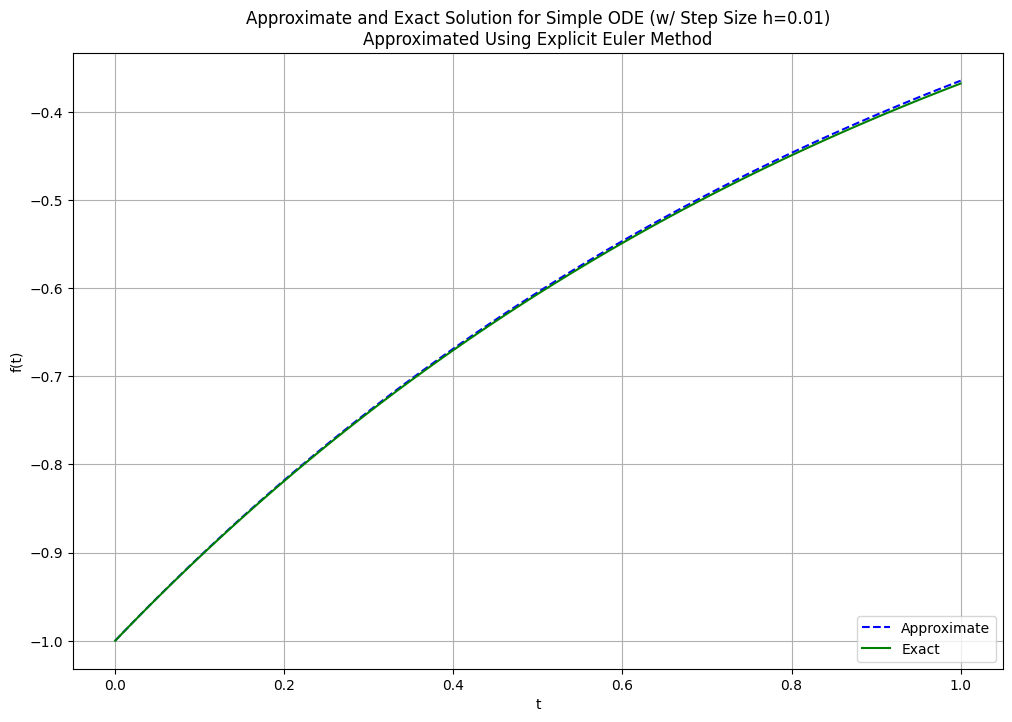

In [6]:
# Same example as above, but w/ smaller step size

# Define parameters of system
f = lambda t, s: np.exp(-t) # ODE
h = 0.01                     # Step size
t = np.arange(0, 1 + h, h)  # Numerical grid, t = [0, 1]
s0 = -1                     # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t)) # creating empty array for state vector S(t)
s[0] = s0 # inputting initial condition

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i]) # computing values for state vector using Explicit Euler formula

# Plot exact and approximate solutions
plt.figure(figsize = (12, 8))
plt.plot(t, s, 'b--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution for Simple ODE (w/ Step Size h=0.01)\nApproximated Using Explicit Euler Method')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

This smaller step size gives us a much more accurate approximation!
* Explicit Euler Formula requires information at $t_j$ so $S(t_{j+1})$ can be written in terms of $t_j$ and $S(t_j)$, and thus computed
* The **Implicit Euler Formula** can be derived by taking the linear approximation of S(t) around $t_{j+1}$ and computing it at $t_j$. This is written as:

$S(t_{j+1})=S(t_j)+hF(t_{j+1}, S(t_{j+1}))$
* Another implicit formula is the **Trapezoidal Formula**, which is the *average* of the Explicit and Implicit Euler Formulas. This is written as:

$S(t_{j+1})=S(t_j)+\frac{h}{2}[F(t_j, S(t_j))+F(t_{j+1}, S(t_{j+1}))]$